# Part 6.4 - Analysis Topic Model of Regions
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import sys, gc
sys.path.insert(0, '../utils')
from utils import filter_topics, plot_topics, plot_wordcloud
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
sns.axes_style("darkgrid")
%matplotlib inline

import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2019-01-31 09:40:52


**In this part, we will use the topic modeling result from part 6.1 to analyze the topics of different regions.** 

**To evaluate and compare the distribution of topics, we use two basic metrics, in practice we use both to find interesting topics:**
1. The dominant topic counts. 

    Every document has a dominant topic represent the most portion of its contents. By summing the number of each dominant topic in a range of time, we see the variety and trend of each topic over time. It is easy to understand and fit for scatter plot, but in this way it ignores  non-dominant topics.

1. The average weight of topics over time.

    This metric is the average weight of a topic through all documents in a range of time, it avoid the issue above, reflect the topic variety and trend over time. However, it might give a frequent/normal topic (which has a small weight in each document) a high weight because the topic appears in large number of documents, when sum all weights of each topic and divid by total weight of all topics, this normal topic may get a high weight.
    

**To visualize the topics, we use below plots:**

1. word cloud to display topic words.

1. Point plot to display the average topic weight over time.

## 1 Load Data

**Load the processed dataframes:**
* `topicKeys.txt`: topic words list
* `domTopic.csv`: document dominant topics dataframe
* `avgWeight.csv`: average topic weight dataframe

### 1.1 Otago

**Topics List:**

In [2]:
path = r'../models/otago/topicKeys.csv'

df_topics_otago = (pd.read_csv(path, 
                               header=None, 
                               index_col=None, 
                               names = ['topic_', 'weight_', 'keywords_'],
                               encoding='utf8')
                   .sort_values(by='topic_')
                   .reset_index(drop=True))

topics_shape = df_topics_otago.shape

In [3]:
print('Shape of dataframe:', topics_shape)
df_topics_otago.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.001030,apply wanted good post work experience wellington position wages salary office experienced box required applications...
1,1,0.004052,killed police received people london persons hundred men explosion city women injured thousand number arrested wound...
2,2,0.000478,rooms price section bungalow deposit large modern home street garage kitchenette good sale post terms tram city view...
3,3,0.004404,meeting committee board motion chairman seconded moved thought matter present report carried messrs read resolution ...
4,4,0.003483,sydney south australia melbourne australian wales new_zealand received victoria queensland government federal adelai...


**Docmument - dominant topics dataframe:**

In [4]:
path = r'../models/otago/domTopics.csv'

df_domtopic_otago = pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                                dtype={2:'str'},
                                encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_otago['keywords'] = df_domtopic_otago['keywords_'].str.slice(0,60)+'...'
df_domtopic_otago.drop("keywords_", axis=1, inplace=True)

In [5]:
print('Shape of dataframe:', df_domtopic_otago.shape)
df_domtopic_otago.sample(5)

Shape of dataframe: (374495, 6)


,id,region,year,topic,weight,keywords
227141,12658913,Otago,1897,106,0.220665,hall to-night night saturday prices admission dance grand bo...
213710,11985732,Otago,1899,42,0.244973,time question matter present fact made case position public ...
229050,12750645,Otago,1898,38,0.178983,tin ill oil day lit zealand mil ton tie hat aro fur aid ail ...
118135,6732387,Otago,1880,118,0.095685,association meeting conference wellington union new_zealand ...
312342,32689157,Otago,1914,183,0.141709,police man found murder shot arrested men named made house n...


**Average topic weight dataframe:**

In [6]:
path = r'../models/otago/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_otago, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_otago = df_avgweight

df_topics_otago.columns = ['topic', 'weight', 'keywords']

In [7]:
print('Shape of dataframe:', df_avgweight_otago.shape)
df_avgweight_otago.sample(5)

Shape of dataframe: (15800, 4)


,year,topic,weight,keywords
4522,1873,122,0.000827,ewes cows heifers sale fat steers year tooth lambs mixed wet...
15084,1929,84,0.002227,dunedin invercargill lawrence southland gore balclutha otago...
6514,1883,114,0.001584,wool sale company agents produce stock sales commission grai...
2599,1863,199,0.002960,hokitika greymouth street coast grey quay west reefton westl...
1420,1858,20,0.000135,rooms price section terms house gas water land bath good lar...


### 1.2 Canterbury

**Topics List:**

In [8]:
path = r'../models/canterbury/topicKeys.csv'

df_topics_canterbury = (pd.read_csv(path, 
                                    header=None, 
                                    index_col=None, 
                                    names = ['topic_', 'weight_', 'keywords_'],
                                    encoding='utf8')
                        .sort_values(by='topic_')
                        .reset_index(drop=True))

In [9]:
print('Shape of dataframe:', df_topics_canterbury.shape)
df_topics_canterbury.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.000487,apply wanted good post work experience wellington position wages salary office experienced box required applications...
1,1,0.005459,killed police received people london persons hundred men explosion city women injured thousand number arrested wound...
2,2,0.000467,rooms price section bungalow deposit large modern home street garage kitchenette good sale post terms tram city view...
3,3,0.004173,meeting committee board motion chairman seconded moved thought matter present report carried messrs read resolution ...
4,4,0.003988,sydney south australia melbourne australian wales new_zealand received victoria queensland government federal adelai...


**Docmument - dominant topics dataframe:**

In [10]:
path = r'../models/canterbury/domTopics.csv'

df_domtopic_canterbury = pd.read_csv(path, 
                                     header=None, 
                                     index_col=None, 
                                     names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                                     dtype={2:'str'},
                                     encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_canterbury['keywords'] = df_domtopic_canterbury['keywords_'].str.slice(0,60)+'...'
df_domtopic_canterbury.drop("keywords_", axis=1, inplace=True)

In [11]:
print('Shape of dataframe:', df_domtopic_canterbury.shape)
df_domtopic_canterbury.sample(5)

Shape of dataframe: (282791, 6)


,id,region,year,topic,weight,keywords
123145,12714023,Canterbury,1898,23,0.124669,lord london house irish ireland commons government sir home ...
132137,13153354,Canterbury,1912,100,0.222818,suits clothing men's boys tweed shirts hats trousers prices ...
213088,16212448,Canterbury,1919,31,0.173879,hair soap skin column advertisements toilet teeth bottle fac...
55835,7468075,Canterbury,1899,193,0.100570,life love god heart day thy man world great thou men death l...
281619,27761246,Canterbury,1918,38,0.107199,tin ill oil day lit zealand mil ton tie hat aro fur aid ail ...


**Average topic weight dataframe:**

In [12]:
path = r'../models/canterbury/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_canterbury, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_canterbury = df_avgweight

df_topics_canterbury.columns = ['topic', 'weight', 'keywords']

In [13]:
print('Shape of dataframe:', df_avgweight_otago.shape)
df_avgweight_otago.sample(5)

Shape of dataframe: (15800, 4)


,year,topic,weight,keywords
12963,1918,163,0.008116,auckland thames paeroa queen-street hamilton tauranga queen ...
10324,1902,124,0.000968,extract sander eucalypti sons sander's eucalyptus medical ad...
848,1855,48,0.007134,land lands block acres section crown sections district lease...
15168,1929,168,0.002633,good great present applause work people years made time chee...
8883,1895,83,0.002251,meeting club members committee messrs secretary held annual ...


### 1.3 Manawatu-Wanganui

**Topics List:**

In [14]:
path = r'../models/manawatu-wanganui/topicKeys.csv'

df_topics_mw = (pd.read_csv(path, 
                            header=None, 
                            index_col=None, 
                            names = ['topic_', 'weight_', 'keywords_'],
                            encoding='utf8')
                .sort_values(by='topic_')
                .reset_index(drop=True))

In [15]:
print('Shape of dataframe:', topics_shape)
df_topics_mw.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.003078,apply wanted good post work experience wellington position wages salary office experienced box required applications...
1,1,0.005032,killed police received people london persons hundred men explosion city women injured thousand number arrested wound...
2,2,0.000380,rooms price section bungalow deposit large modern home street garage kitchenette good sale post terms tram city view...
3,3,0.005951,meeting committee board motion chairman seconded moved thought matter present report carried messrs read resolution ...
4,4,0.004407,sydney south australia melbourne australian wales new_zealand received victoria queensland government federal adelai...


**Docmument - dominant topics dataframe:**

In [16]:
path = r'../models/manawatu-wanganui/domTopics.csv'

df_domtopic_mw = pd.read_csv(path, 
                             header=None, 
                             index_col=None, 
                             names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                             dtype={2:'str'},
                             encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_mw['keywords'] = df_domtopic_mw['keywords_'].str.slice(0,60)+'...'
df_domtopic_mw.drop("keywords_", axis=1, inplace=True)

In [17]:
print('Shape of dataframe:', df_domtopic_mw.shape)
df_domtopic_mw.sample(5)

Shape of dataframe: (344669, 6)


,id,region,year,topic,weight,keywords
336653,27415655,Manawatu-Wanganui,1900,28,0.197475,man good people time day men money make thing young put busi...
108885,10277477,Manawatu-Wanganui,1892,28,0.112251,man good people time day men money make thing young put busi...
105805,9930826,Manawatu-Wanganui,1891,143,0.190379,natives native maori maoris government land islands auckland...
50379,5025547,Manawatu-Wanganui,1878,38,0.112851,tin ill oil day lit zealand mil ton tie hat aro fur aid ail ...
277079,26093967,Manawatu-Wanganui,1913,107,0.159410,school education schools board children teachers boys teache...


**Average topic weight dataframe:**

In [18]:
path = r'../models/manawatu-wanganui/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_mw, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_mw = df_avgweight

df_topics_mw.columns = ['topic', 'weight', 'keywords']

In [19]:
print('Shape of dataframe:', df_avgweight_mw.shape)
df_avgweight_mw.sample(5)

Shape of dataframe: (10200, 4)


,year,topic,weight,keywords
493,1869,93,0.020067,people country men public government law political state par...
7603,1908,3,0.007505,meeting committee board motion chairman seconded moved thoug...
8937,1914,137,0.003291,commission department report made evidence government servic...
9998,1919,198,0.005653,church rev sunday service services evening presbyterian meth...
9954,1919,154,0.002855,government sir house premier members colony opposition minis...


### 1.4 Wellington

**Topics List:**

In [20]:
path = r'../models/wellington/topicKeys.csv'

df_topics_wellington = (pd.read_csv(path, 
                                    header=None, 
                                    index_col=None, 
                                    names = ['topic_', 'weight_', 'keywords_'],
                                    encoding='utf8')
                        .sort_values(by='topic_')
                        .reset_index(drop=True))

In [21]:
print('Shape of dataframe:', df_topics_wellington.shape)
df_topics_wellington.head()

Shape of dataframe: (200, 3)


,topic_,weight_,keywords_
0,0,0.001126,apply wanted good post work experience wellington position wages salary office experienced box required applications...
1,1,0.008540,killed police received people london persons hundred men explosion city women injured thousand number arrested wound...
2,2,0.000862,rooms price section bungalow deposit large modern home street garage kitchenette good sale post terms tram city view...
3,3,0.003040,meeting committee board motion chairman seconded moved thought matter present report carried messrs read resolution ...
4,4,0.003977,sydney south australia melbourne australian wales new_zealand received victoria queensland government federal adelai...


**Docmument - dominant topics dataframe:**

In [22]:
path = r'../models/wellington/domTopics.csv'

df_domtopic_wellington = pd.read_csv(path, 
                                     header=None, 
                                     index_col=None, 
                                     names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                                     dtype={2:'str'},
                                     encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic_wellington['keywords'] = df_domtopic_wellington['keywords_'].str.slice(0,60)+'...'
df_domtopic_wellington.drop("keywords_", axis=1, inplace=True)

In [23]:
print('Shape of dataframe:', df_domtopic_wellington.shape)
df_domtopic_wellington.sample(5)

Shape of dataframe: (634731, 6)


,id,region,year,topic,weight,keywords
401084,19005303,Wellington,1925,42,0.216920,time question matter present fact made case position public ...
121865,17106830,Wellington,1918,42,0.227271,time question matter present fact made case position public ...
181129,17565398,Wellington,1930,87,0.323506,port arrived steamer cargo left captain vessel ship auckland...
201183,17701818,Wellington,1940,28,0.120541,man good people time day men money make thing young put busi...
303942,18358139,Wellington,1927,38,0.179582,tin ill oil day lit zealand mil ton tie hat aro fur aid ail ...


**Average topic weight dataframe:**

In [24]:
path = r'../models/wellington/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics_wellington, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_avgweight_wellington = df_avgweight

df_topics_wellington.columns = ['topic', 'weight', 'keywords']

In [25]:
print('Shape of dataframe:', df_avgweight_wellington.shape)
df_avgweight_wellington.sample(5)

Shape of dataframe: (20600, 4)


,year,topic,weight,keywords
8210,1881,10,0.007413,church bishop catholic rev religious father god christian sy...
13848,1912,48,0.002740,land lands block acres section crown sections district lease...
6907,1874,107,0.003632,school education schools board children teachers boys teache...
10879,1894,79,0.000995,good fat sold sheep ewes prices cattle sale wethers lambs co...
15413,1920,13,0.007105,water feet river building work bridge side flood large groun...


## 2 The Most Distinct Documents

**First of all, check the document with the highest weight topic through all documents, which means the document contains the fewest topics, easy to check the topic by eyes. Most this kind of documents are oversimplified, but it is a simple way to check topics. Here we print the top one of them.**

### 2.1 Otago

In [26]:
df_domtopic_otago.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
17855,2665230,Otago,1866,146,0.952891,colony country new_zealand great large land population prese...
151902,8573573,Otago,1887,194,0.900127,bill house amendment council committee act government passed...
19734,2763505,Otago,1867,146,0.791156,colony country new_zealand great large land population prese...


In [27]:
id_ = df_domtopic_otago.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

2665230

In [28]:
%%bash -s $id_

echo 'Print 1500 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 1500 characters of document id: 2665230
99988:2665230	Page 2 Advertisements Column 4	SPECIFYING THE FROPEBTT.household freehold freehold freehold freehold freehold freehold freehold freehold freehold freehold freehold freehold leasehold freehold freehold freehold freehold freehold household household freehold freehold household freehold household freehold freehold freehold freehold freehold leasehold freehold freehold freehold freehold freehold leasehold freehold freehold freehold leasehold leasehold freehold leasehold leasehold freehold household household freehold freehold freehold freehold leasehold freehold freehold freehold freehold freehold freehold leasehold household freehold freehold freehold freehold freehold freehold freehold freehold household freehold freehold joint leasehold leasehold freehold freehold freehold freehold freehold freehold freehold freehold freehold freehold household leasehold freehold leasehold freehold freehold freehold freehold freehold freehold f

### 2.2 Canterbury

In [29]:
df_domtopic_canterbury.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
131681,13132910,Canterbury,1912,125,0.890974,street prices phone advertisements column motor good price c...
205386,15901469,Canterbury,1918,58,0.842403,children women wife woman child husband mrs young mother yea...
204084,15834293,Canterbury,1918,116,0.829364,street dunedin princes otago george times south octagon ratt...


In [30]:
id_ = df_domtopic_canterbury.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

13132910

In [31]:
%%bash -s $id_

echo 'Print 1500 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 1500 characters of document id: 13132910
1205964:13132910	SUN.	"SUN.Oct. 19 Oct. 20 Oct. 21 ... Oct. 22 Oct. 23 Oct. 24 ... • Oct 25 Oct. 26 ... Oct. 27 Oct. 28 ... Oct. 29 Oct. 30 ... Oct. 31 ... ... 5.5 ... 6.26 • •• 5.3 ;.. 6.28 ■ •• 5.1 ... 6.29 • ■• 5.0 ... 6.3* ... 4.58 ... 6.31 \" ... 4.56 ... 6.33 ... 4.55 ... 6.34. ... 4.53 ... 6.3S ... 4.52 y ... 6.3ft ... 4.51 ... 6.3a . ■ ... 4.49 ... 6.39 - 4.48 ... 6.40 ' ••• 4.47 ... 6.4^"


### 2.3 Manawatu-Wanganui

In [32]:
df_domtopic_mw.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
310015,26292759,Manawatu-Wanganui,1917,33,0.867788,years london great england english year ago time made world ...
134042,12599502,Manawatu-Wanganui,1899,33,0.817326,years london great england english year ago time made world ...
271692,26060372,Manawatu-Wanganui,1912,33,0.817326,years london great england english year ago time made world ...


In [33]:
id_ = df_domtopic_mw.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

26292759

In [34]:
%%bash -s $id_

echo 'Print 1500 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 1500 characters of document id: 26292759
2488940:26292759	PHASES OF THE MOON.	PHASES OF THE MOON.ACGCSTPerigue, 4d. Bh. 46min. a.m. Apogee, 18d llh. 42min p.m.D Full Moon 3 Last Quarter 10. New i«oon 13 First Quarter ...... 26 ). H 4 7 5 6 I. ill. S. 27 21 p.rn 33 16 a.m 58 12 a.m 45 14 a.m


### 2.4 Wellington

In [35]:
df_domtopic_wellington.sort_values(by='weight', ascending=False).head(3)

,id,region,year,topic,weight,keywords
262440,18086539,Wellington,1926,93,0.971094,people country men public government law political state par...
260118,18071996,Wellington,1926,93,0.969229,people country men public government law political state par...
234888,17913197,Wellington,1928,91,0.842181,don't man good it's boy i'm time day asked make back that's ...


In [36]:
id_ = df_domtopic_canterbury.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

13132910

In [37]:
%%bash -s $id_

echo 'Print 1500 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 1500 characters of document id: 13132910
1205964:13132910	SUN.	"SUN.Oct. 19 Oct. 20 Oct. 21 ... Oct. 22 Oct. 23 Oct. 24 ... • Oct 25 Oct. 26 ... Oct. 27 Oct. 28 ... Oct. 29 Oct. 30 ... Oct. 31 ... ... 5.5 ... 6.26 • •• 5.3 ;.. 6.28 ■ •• 5.1 ... 6.29 • ■• 5.0 ... 6.3* ... 4.58 ... 6.31 \" ... 4.56 ... 6.33 ... 4.55 ... 6.34. ... 4.53 ... 6.3S ... 4.52 y ... 6.3ft ... 4.51 ... 6.3a . ■ ... 4.49 ... 6.39 - 4.48 ... 6.40 ' ••• 4.47 ... 6.4^"


## 3 Word Cloud

**Since MALLET outputs topic keywords without weight of each keywords, so we will add sequential weight (like arithmetic progression) for each keywords, which means the weight of each keywords is not accurate, but for word cloud it is acceptable. Below plot shows the highest weight 4 topics in topics list of each region.**

#### 3.1 Otago

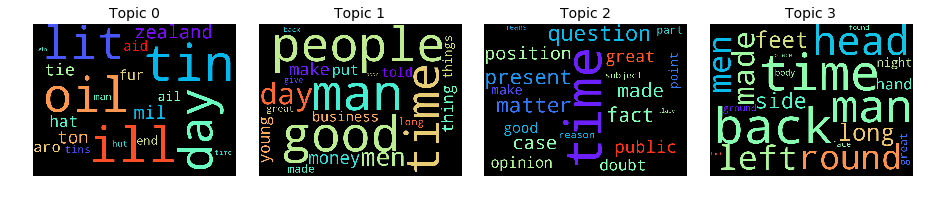

In [38]:
df_plt = df_topics_otago.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, 20, 4)

#### 3.2 Canterbury

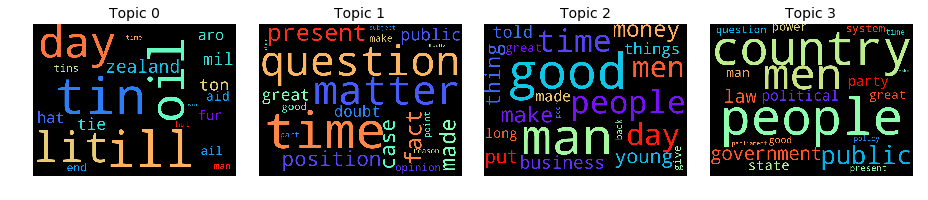

In [39]:
df_plt = df_topics_canterbury.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, 20, 4)

#### 3.3 Manawatu-Wanganui

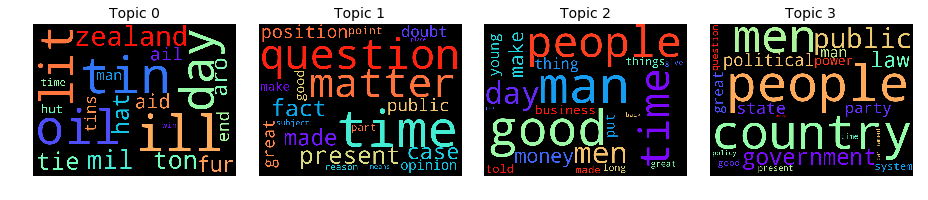

In [40]:
df_plt = df_topics_mw.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, 20, 4)

#### 3.4 Wellington

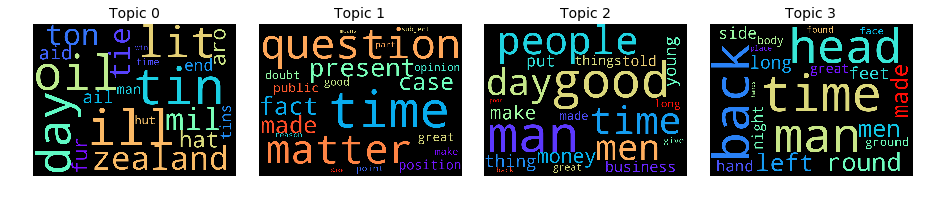

In [41]:
df_plt = df_topics_wellington.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 4, 20, 4)

## 4 The Most Significant Topics of Each Region

**Variance dose not consider the document number, if a topic has high variance but the support documents are few, the topic is not significant. To find significant, we use the figure that dominant topic count multiply the average weight of the topic, this figure considers both the number of support document and the average weight of topic. This way magnifies the topics that are dominant topics of documents, we take it as significant topics.**

### 4.1 Otago

In [42]:
df_domtopic_count = (df_domtopic_otago.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_otago.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Otago:', topic_list)

df_plt_avg = filter_topics(df_avgweight_otago, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_otago, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Otago: [38, 28, 42, 63, 93, 136, 159, 33, 146, 193]
Shape of df_plt_avg: (316, 4)


,weight,keywords
topic,,
38,0.097971,tin ill oil day lit zealand mil ton tie hat aro fur aid ail end tins man hut time win
28,0.045187,man good people time day men money make thing young put business told things made long great give back poor
42,0.032810,time question matter present fact made case position public great doubt opinion good make point part reason subject ...
63,0.031750,time back man head round left men made long feet side hand night great ground body face found place hands
93,0.022267,people country men public government law political state party man great power system question good present time pol...
136,0.018269,life man men great world work people good human time mind nature things years knowledge subject character make fact ...
159,0.017767,london government french british foreign sir news england lord paris received english france general great prince ma...
33,0.014919,years london great england english year ago time made world lord sir french paris king famous life death found history
146,0.014254,colony country new_zealand great large land population present time years people means good colonies made industry n...


**Average topic weight by year:**

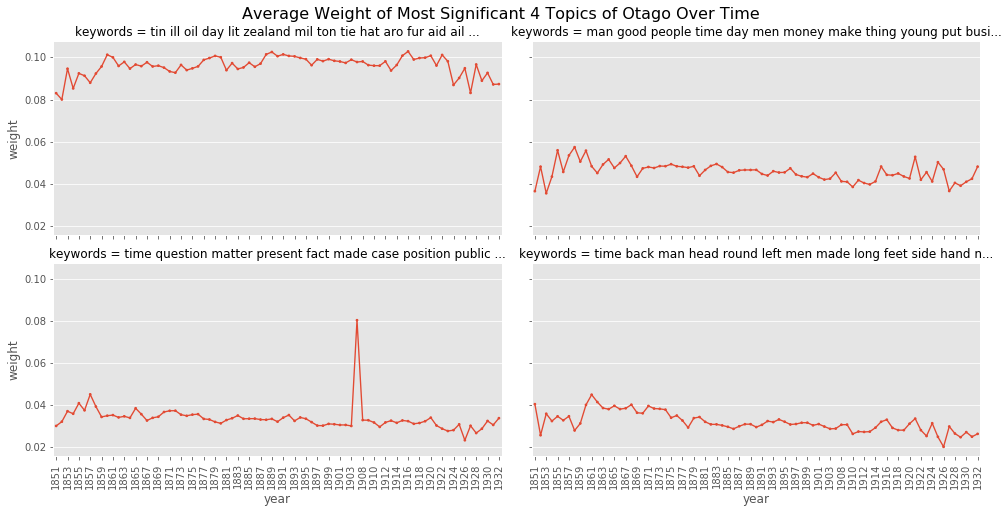

In [43]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Otago Over Time',
            height=3.5,
            col_wrap=2)

### 4.2 Canterbury

In [44]:
df_domtopic_count = (df_domtopic_canterbury.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_canterbury.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Canterbury:', topic_list)

df_plt_avg = filter_topics(df_avgweight_canterbury, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_canterbury, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Canterbury: [38, 28, 42, 93, 136, 63, 33, 146, 159, 104]
Shape of df_plt_avg: (356, 4)


,weight,keywords
topic,,
38,0.080938,tin ill oil day lit zealand mil ton tie hat aro fur aid ail end tins man hut time win
28,0.037375,man good people time day men money make thing young put business told things made long great give back poor
42,0.038407,time question matter present fact made case position public great doubt opinion good make point part reason subject ...
93,0.029400,people country men public government law political state party man great power system question good present time pol...
136,0.023210,life man men great world work people good human time mind nature things years knowledge subject character make fact ...
63,0.022860,time back man head round left men made long feet side hand night great ground body face found place hands
33,0.020142,years london great england english year ago time made world lord sir french paris king famous life death found history
146,0.015778,colony country new_zealand great large land population present time years people means good colonies made industry n...
159,0.018174,london government french british foreign sir news england lord paris received english france general great prince ma...


**Average topic weight by year:**

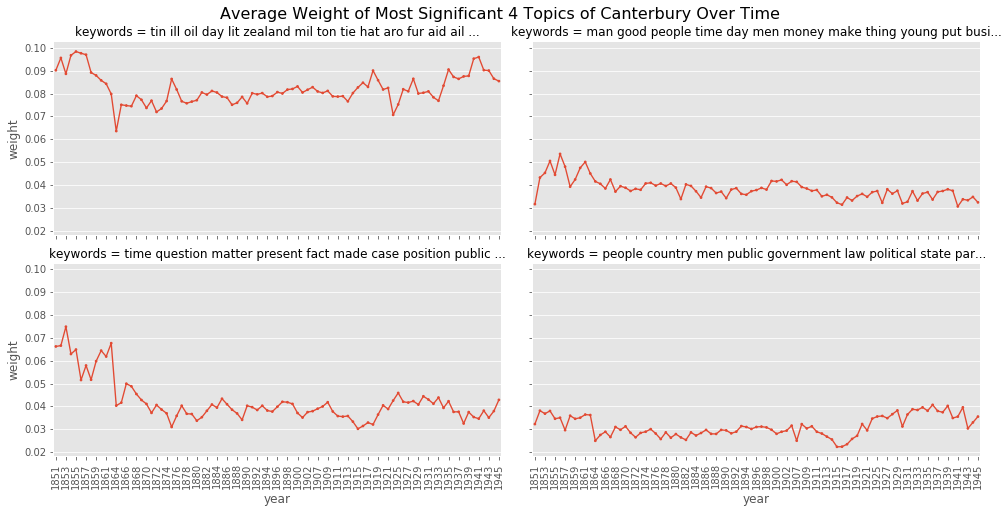

In [45]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Canterbury Over Time',
            height=3.5,
            col_wrap=2)

### 4.3 Manawatu-Wanganui

In [46]:
df_domtopic_count = (df_domtopic_mw.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_mw.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Manawatu-Wanganui:', topic_list)

df_plt_avg = filter_topics(df_avgweight_mw, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_mw, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Manawatu-Wanganui: [38, 28, 42, 93, 63, 136, 33, 193, 146, 159]
Shape of df_plt_avg: (204, 4)


,weight,keywords
topic,,
38,0.088036,tin ill oil day lit zealand mil ton tie hat aro fur aid ail end tins man hut time win
28,0.036776,man good people time day men money make thing young put business told things made long great give back poor
42,0.040491,time question matter present fact made case position public great doubt opinion good make point part reason subject ...
93,0.022061,people country men public government law political state party man great power system question good present time pol...
63,0.021990,time back man head round left men made long feet side hand night great ground body face found place hands
136,0.016397,life man men great world work people good human time mind nature things years knowledge subject character make fact ...
33,0.019356,years london great england english year ago time made world lord sir french paris king famous life death found history
193,0.016563,life love god heart day thy man world great thou men death long light thee earth eyes home sweet land
146,0.016394,colony country new_zealand great large land population present time years people means good colonies made industry n...


**Average topic weight by year:**

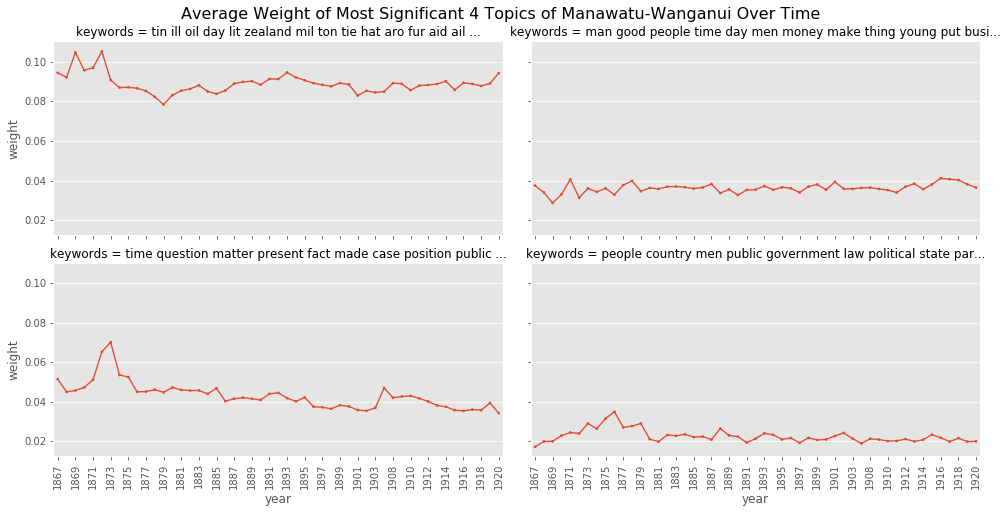

In [47]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Manawatu-Wanganui Over Time',
            height=3.5,
            col_wrap=2)

### 4.4 Wellington

In [48]:
df_domtopic_count = (df_domtopic_wellington.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight_wellington.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('Significant topic list of Wellington:', topic_list)

df_plt_avg = filter_topics(df_avgweight_wellington, topic_list[:4])

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_wellington, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]

col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]

df_col_order.head(10)

Significant topic list of Wellington: [38, 42, 28, 63, 136, 93, 33, 193, 189, 159]
Shape of df_plt_avg: (412, 4)


,weight,keywords
topic,,
38,0.075457,tin ill oil day lit zealand mil ton tie hat aro fur aid ail end tins man hut time win
42,0.037219,time question matter present fact made case position public great doubt opinion good make point part reason subject ...
28,0.035994,man good people time day men money make thing young put business told things made long great give back poor
63,0.025955,time back man head round left men made long feet side hand night great ground body face found place hands
136,0.020329,life man men great world work people good human time mind nature things years knowledge subject character make fact ...
93,0.022014,people country men public government law political state party man great power system question good present time pol...
33,0.018866,years london great england english year ago time made world lord sir french paris king famous life death found history
193,0.018394,life love god heart day thy man world great thou men death long light thee earth eyes home sweet land
189,0.013417,made water air time process light means small found great surface ordinary long form system method weight invention ...


**Average topic weight by year:**

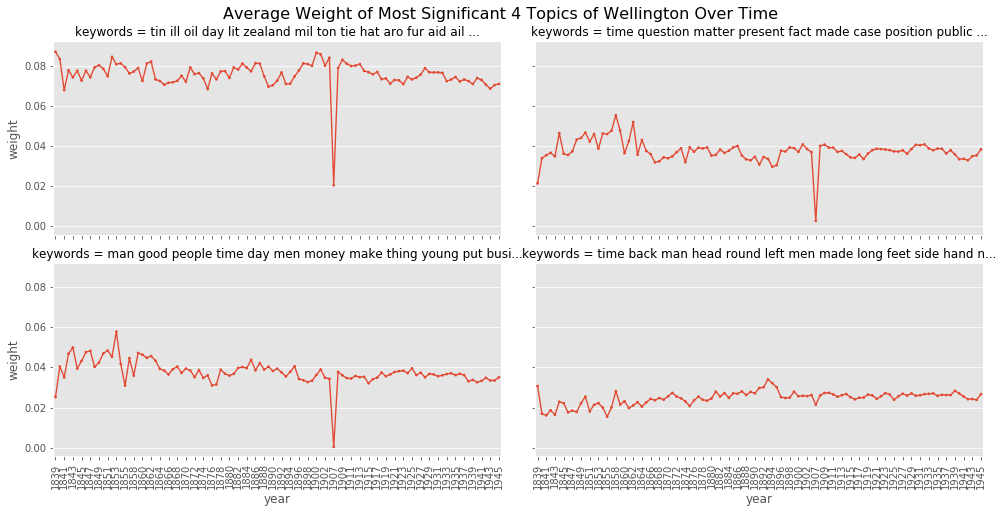

In [49]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Significant 4 Topics of Wellington Over Time',
            height=3.5,
            col_wrap=2)

## 5 Differet Topics from Other Regions

**By compare the topic weight in topic list, we can find out which topics are the most different in the regions. Here we are interested in both trend (the more or less popular topics) in the region.**

### 5.1 Otago

In [50]:
path = r'../models/otago/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_otago)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_otago, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_otago, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [126, 185, 21, 102, 41, 66, 171, 34, 74, 95]
Shape of df_plt_avg: (790, 4)


,weight,keywords
topic,,
126,0.001360,association press telegraph received copyright london united electric cable sydney april march news australian octob...
185,0.001318,wellington arrived nelson morning sailed auckland tons to-morrow port to-day lyttelton westport coast south picton l...
21,0.001076,mails mail close office letters notices auckland united_kingdom post wellington chief late europe london fee due dai...
102,0.000404,stock bank buyers sellers new_zealand national sales pref insurance cent wellington ord auckland waihi exchange shar...
41,0.000466,auckland wellington left due london january december lyttelton march october april february november september sydne...
66,0.001153,wool market london sales new_zealand bales prices mutton cent good wheat demand beef firm australian sold received c...
171,0.002247,german enemy germans front french london british fighting troops attack captured received russian artillery line sta...
34,0.001447,weather rain wind winds heavy moderate hours strong barometer light gale to-day cape forecast breeze sea morning sou...
74,0.001325,men service soldiers war military army new_zealand defence camp officers training returned force soldier general for...


**Average topic weight by year:**

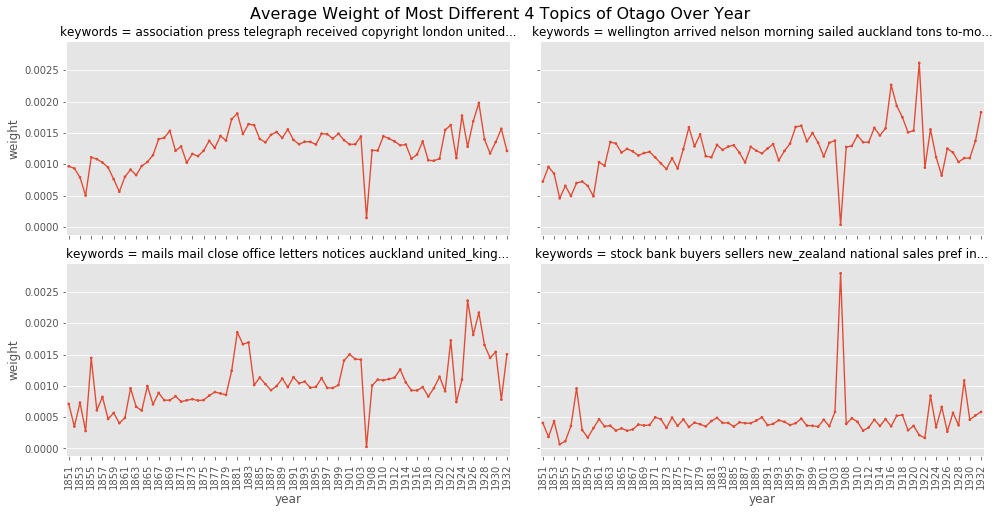

In [51]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Otago Over Year',
            height=3.5,
            col_wrap=2)

### 5.2 Canterbury

In [52]:
path = r'../models/canterbury/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_canterbury)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_canterbury, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_canterbury, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [126, 41, 185, 21, 171, 109, 160, 170, 66, 102]
Shape of df_plt_avg: (890, 4)


,weight,keywords
topic,,
126,0.001838,association press telegraph received copyright london united electric cable sydney april march news australian octob...
41,0.000434,auckland wellington left due london january december lyttelton march october april february november september sydne...
185,0.001435,wellington arrived nelson morning sailed auckland tons to-morrow port to-day lyttelton westport coast south picton l...
21,0.001221,mails mail close office letters notices auckland united_kingdom post wellington chief late europe london fee due dai...
171,0.001742,german enemy germans front french london british fighting troops attack captured received russian artillery line sta...
109,0.001195,beat club played match play game championship won players tennis team games round wellington tournament matches satu...
160,0.000409,acres good acre price house land cash farm cows terms balance shed school roomed miles rooms factory years property ...
170,0.001136,team game play match football ball played good goal forwards rugby points wellington players scored saturday line ba...
66,0.001822,wool market london sales new_zealand bales prices mutton cent good wheat demand beef firm australian sold received c...


**Average topic weight by year:**

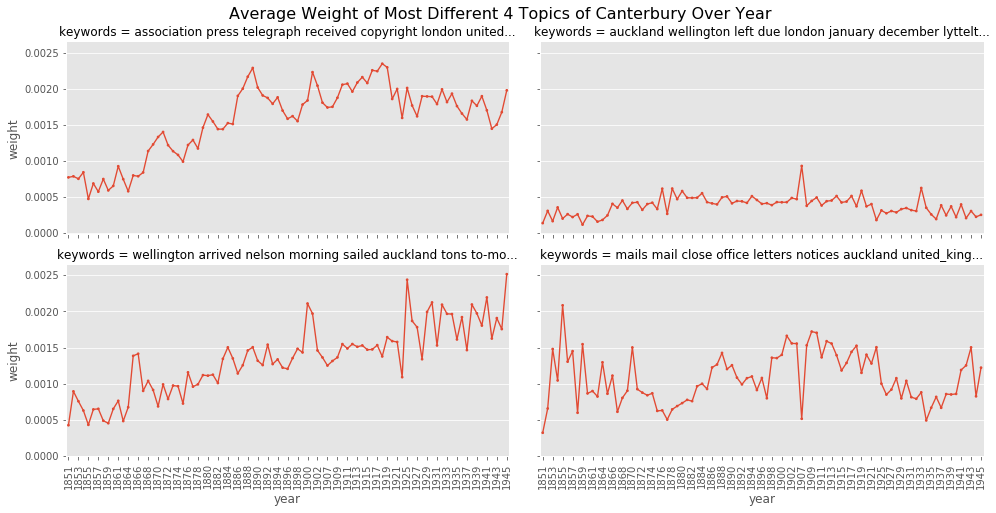

In [53]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Canterbury Over Year',
            height=3.5,
            col_wrap=2)

### 5.3 Manawatu-Wanganui

In [54]:
path = r'../models/manawatu-wanganui/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_mw)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_mw, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_mw, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [21, 185, 102, 41, 126, 34, 130, 72, 109, 171]
Shape of df_plt_avg: (510, 4)


,weight,keywords
topic,,
21,0.000931,mails mail close office letters notices auckland united_kingdom post wellington chief late europe london fee due dai...
185,0.001034,wellington arrived nelson morning sailed auckland tons to-morrow port to-day lyttelton westport coast south picton l...
102,0.000344,stock bank buyers sellers new_zealand national sales pref insurance cent wellington ord auckland waihi exchange shar...
41,0.000467,auckland wellington left due london january december lyttelton march october april february november september sydne...
126,0.002708,association press telegraph received copyright london united electric cable sydney april march news australian octob...
34,0.001155,weather rain wind winds heavy moderate hours strong barometer light gale to-day cape forecast breeze sea morning sou...
130,0.000551,july june august london aug received juno september new_zealand sth bth south sydney rates exchange jane pence new_y...
72,0.001246,daughter son loving aged mrs wife memory years late residence inserted dear mother beloved father john wellington wi...
109,0.001254,beat club played match play game championship won players tennis team games round wellington tournament matches satu...


**Average topic weight by year:**

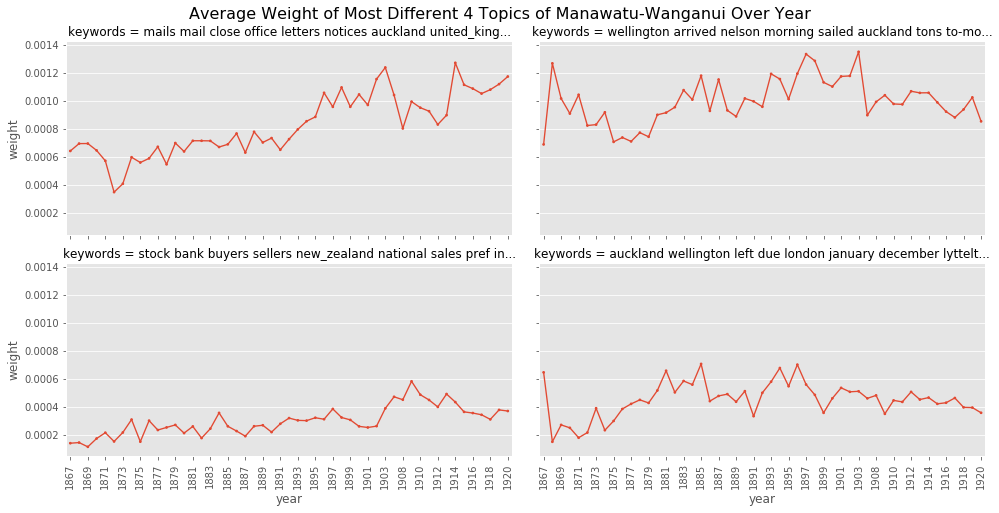

In [55]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Manawatu-Wanganui Over Year',
            height=3.5,
            col_wrap=2)

### 5.4 Wellington

In [56]:
path = r'../models/wellington/topicKeysOthers.csv'

df_topics_others = (pd.read_csv(path, 
                                header=None, 
                                index_col=None, 
                                names = ['topic_', 'weight_', 'keywords_'],
                                encoding='utf8')
                    .sort_values(by='topic_')
                    .reset_index(drop=True))

df_diff = df_topics_others.join(df_topics_wellington)

# to find more populare topics
#df_diff['diff'] = (df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])
# to find more populare or contrary trend topics
df_diff['diff'] = abs(df_diff['weight'] - df_diff['weight_'])/(df_diff['weight'])

df_diff = df_diff.sort_values(by='diff', ascending=False)

topic_list = list(df_diff['topic'][:10])

print('List of topics to plot:', topic_list)

df_plt_avg = filter_topics(df_avgweight_wellington, topic_list)

print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics_wellington, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = (df_col_order.keywords.str.slice(0,60)+'...')[:4]
df_col_order.head(10)

List of topics to plot: [126, 171, 185, 160, 21, 34, 141, 72, 41, 118]
Shape of df_plt_avg: (1030, 4)


,weight,keywords
topic,,
126,0.002295,association press telegraph received copyright london united electric cable sydney april march news australian octob...
171,0.001849,german enemy germans front french london british fighting troops attack captured received russian artillery line sta...
185,0.002172,wellington arrived nelson morning sailed auckland tons to-morrow port to-day lyttelton westport coast south picton l...
160,0.000490,acres good acre price house land cash farm cows terms balance shed school roomed miles rooms factory years property ...
21,0.002171,mails mail close office letters notices auckland united_kingdom post wellington chief late europe london fee due dai...
34,0.001480,weather rain wind winds heavy moderate hours strong barometer light gale to-day cape forecast breeze sea morning sou...
141,0.000862,house street land rooms sale good price acres roomed acre terms section property dwelling road easy water rent splen...
72,0.001489,daughter son loving aged mrs wife memory years late residence inserted dear mother beloved father john wellington wi...
41,0.000788,auckland wellington left due london january december lyttelton march october april february november september sydne...


**Average topic weight by year:**

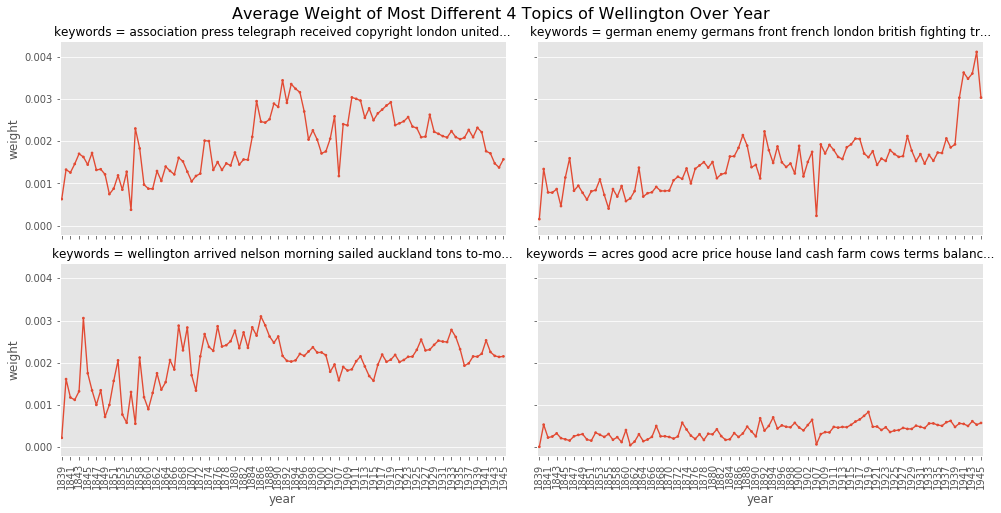

In [57]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.91,
            title='Most Different 4 Topics of Wellington Over Year',
            height=3.5,
            col_wrap=2)

## 6 Different Topics Among The Regions

**Now we compare the different among the regions: Otago, Canterbury, Manawatu-Wanganui and Wellington. We calculate the STD of each topic (STD of 4 topics weight value for each topic), and list the sorted value. Here we plot first 4 most different topics among the regions.** 

In [58]:
df_topics_otago.drop(columns='keywords', inplace=True)
df_topics_otago.columns = ['topic', 'weight_otago']
df_topics_canterbury.drop(columns='keywords', inplace=True)
df_topics_canterbury.columns = ['topic', 'weight_canterbury']
df_topics_mw.drop(columns='keywords', inplace=True)
df_topics_mw.columns = ['topic', 'weight_mw']
df_topics_wellington.columns = ['topic', 'weight_wellington', 'keywords']


df_topics = (df_topics_otago
             .merge(df_topics_canterbury, on='topic')
             .merge(df_topics_mw, on='topic')
             .merge(df_topics_wellington, on='topic'))

df_topics['std'] = df_topics[df_topics.columns[1:5]].std(axis=1)

df_topics = df_topics.sort_values(by='std', ascending=False)

topic_list = list(df_topics['topic'][:10])

print('List of topics to plot:', topic_list)

regions = ['otago', 'canterbury', 'manawatu-wanganui', 'wellington']

df_topics.head(10)

List of topics to plot: [38, 52, 135, 63, 28, 178, 71, 93, 180, 42]


,topic,weight_otago,weight_canterbury,weight_mw,weight_wellington,keywords,std
38,38,0.097971,0.080938,0.088036,0.075457,tin ill oil day lit zealand mil ton tie hat aro fur aid ail end tins man hut time win,0.009723
52,52,0.011130,0.019161,0.010866,0.007176,business public notice orders begs attention stock street goods general premises inform prices customers advertiseme...,0.005052
135,135,0.009174,0.005859,0.008972,0.017409,trees fruit plants apples garden varieties plant flowers tree shrubs flower planting seeds good nursery soil roses s...,0.004942
63,63,0.031750,0.022860,0.021990,0.025955,time back man head round left men made long feet side hand night great ground body face found place hands,0.004415
28,28,0.045187,0.037375,0.036776,0.035994,man good people time day men money make thing young put business told things made long great give back poor,0.004274
178,178,0.007583,0.007013,0.014589,0.004911,tin tins tea sugar soap jam prices large jars bottle dozen fruit finest lod doz quality fruits cash box teas,0.004203
71,71,0.004837,0.013604,0.005539,0.007586,street work stock general agent made advertisements prices orders column kinds opposite description notice large hou...,0.003983
93,93,0.022267,0.029400,0.022061,0.022014,people country men public government law political state party man great power system question good present time pol...,0.003645
180,180,0.016007,0.008139,0.011112,0.011880,london sold powder medicines wholesale medical public oil sauce agents genuine chemist prepared chemists medicine bo...,0.003245
42,42,0.032810,0.038407,0.040491,0.037219,time question matter present fact made case position public great doubt opinion good make point part reason subject ...,0.003243


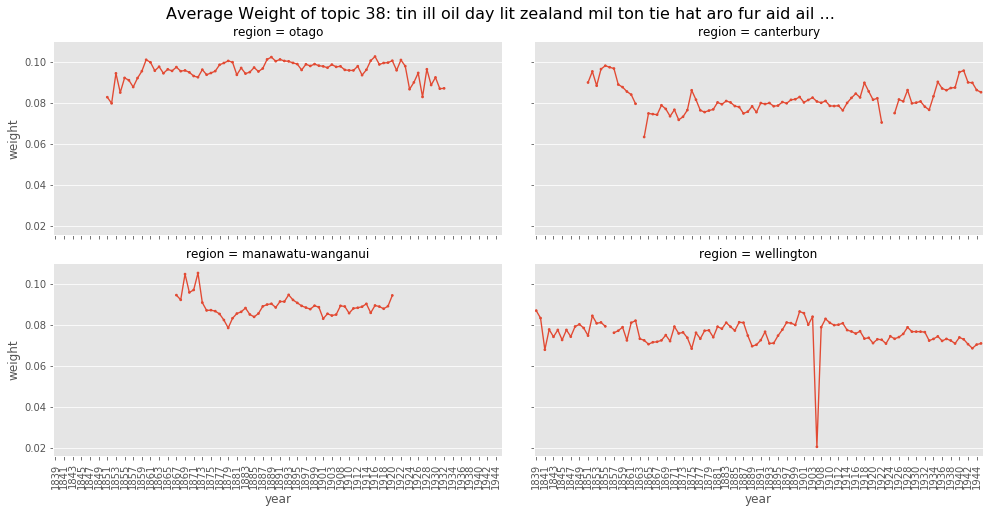

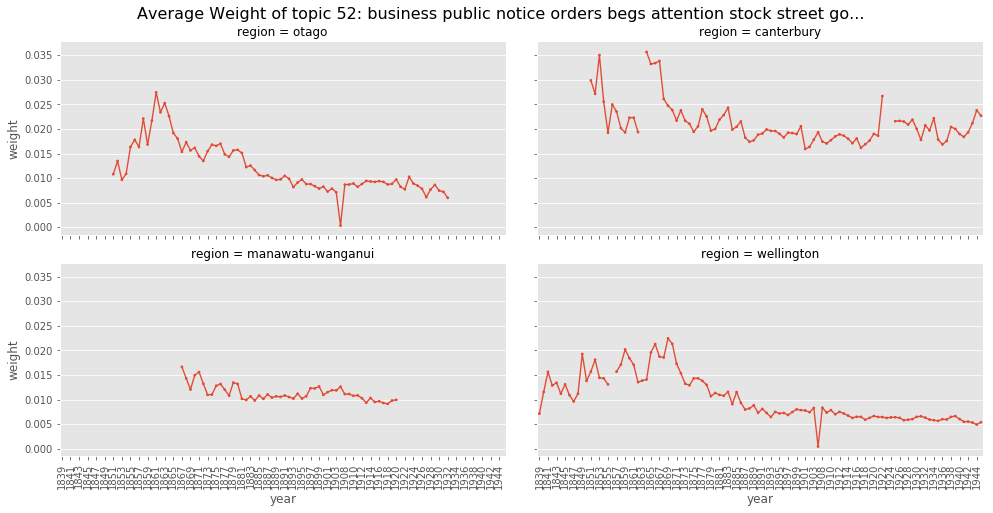

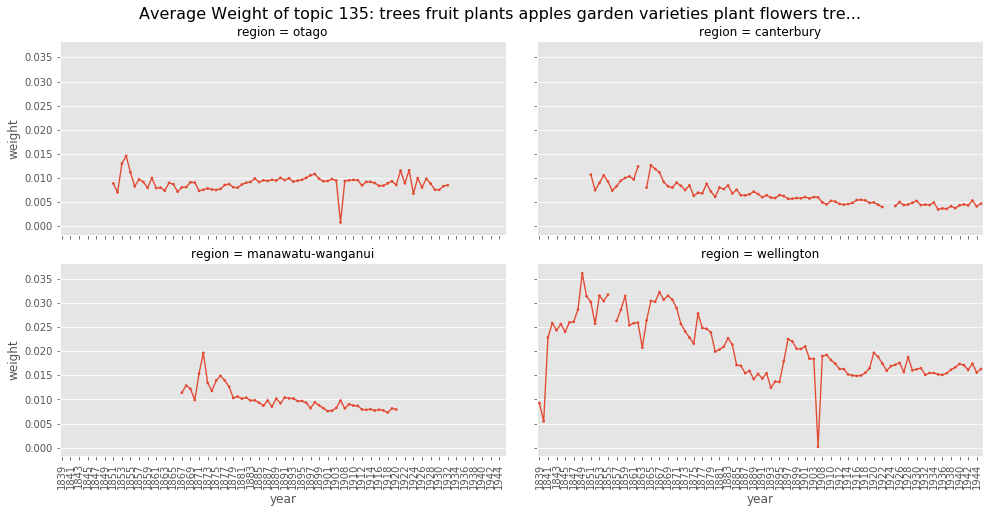

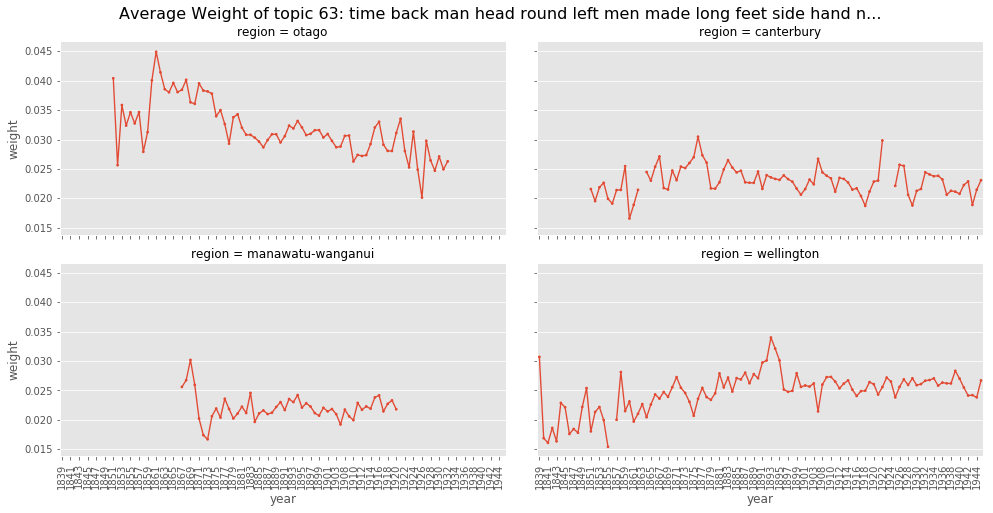

In [59]:
for i in range(4):
    df_plt_avg_otago = filter_topics(df_avgweight_otago, [topic_list[i]])
    df_plt_avg_otago['region'] = 'otago'
    df_plt_avg_canterbury = filter_topics(df_avgweight_canterbury, [topic_list[i]])
    df_plt_avg_canterbury['region'] = 'canterbury'
    df_plt_avg_mw = filter_topics(df_avgweight_mw, [topic_list[i]])
    df_plt_avg_mw['region'] = 'manawatu-wanganui'
    df_plt_avg_wellington = filter_topics(df_avgweight_wellington, [topic_list[i]])
    df_plt_avg_wellington['region'] = 'wellington'
    
    df_plt_avg = pd.concat([df_plt_avg_otago, df_plt_avg_canterbury, df_plt_avg_mw, df_plt_avg_wellington])
    
    keywords = (df_plt_avg.keywords.str.slice(0,60)+'...').tolist()[0]
    title = str(topic_list[i])+': '+keywords
    
    plot_topics(df_plt_avg, 
                'region', 
                col_order=regions,
                adjust_top=0.91,
                title=title,
                height=3.5,
                col_wrap=2)

---

In [60]:
gc.collect()

219338